## Data Preparation and Analysis #

Now , we're gonna try to prepare and clean our data.

In [15]:
import pandas as pd
import numpy as np

Our data is divided into three parts :

1. **Training Data**: The aircraft engine run-to-failure data.


2.   **Test Data**: The aircraft engine operating data without failure events recorded.

3. **Truth Data**: The true remaining cycles for each engine in the testing data for comparison between predictions and truth.

These files are .txt files, we gotta read them as CSVs in Pandas, so we can do our cleaning and preparation operations simply.




# Train Data

Let's begin by uploading our  Train Data, and visualize the first rows.

In [18]:
d_train_raw = pd.read_csv('sample_data/PM_train (1).txt', sep = ' ', header=None)
d_train_raw.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21      22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388.0  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388.0  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388.0  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388.0  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388.0  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

As we can see, the Data columns don't have names , but as we already put the problem in the previous context (see Project report), we know that :

1.  **First column : id** ,is the engine ID, ranging from 1 to 100.
2.   **Second column :  cycle per engine sequence**, starts from 1 to the cycle number where failure had happened.
3. **Column three,four, and five : setting1 to setting3**, engine operational settings.
4. **Remaining columns : s1 to s23**,  23 sensors measurements.




Let's name the columns for an easy manipulation.

In [19]:
column_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23']
d_train_raw.columns = column_names
d_train_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      s14     s15   s16  s17     s18    s19    s20      s21  s22  \
0  14.62  ...  8138.62  8.4195  0.03  392  2388.0  100.0  39.06  23.4190  NaN   
1  14.62  ...  8131.49  8.4318  0.03  392  2388.0  100.0  39.00  23.4236  NaN   
2  14.62  ...  8133.23  8.4178  0.03  390  2388.0  100.0  38.95  23.3442  NaN   
3  14.62  ...  8133.83  8.3682  0.03  392  2388.0  100.0  38.88  23.3739  NaN   
4  14.62  ...  8133.80  8.4294  0.03  393  2388.0  100.0  38.90  23.4044  NaN   

   s23  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 28 columns]

Now let's check the NaN values, because we noticed that the last two columns represent some NaN values.

---



In [20]:
d_train_raw.isnull().sum()

id              0
cycle           0
setting1        0
setting2        0
setting3        0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
s7              0
s8              0
s9              0
s10             0
s11             0
s12             0
s13             0
s14             0
s15             0
s16             0
s17             0
s18             1
s19             1
s20             1
s21             1
s22         12315
s23         12315
dtype: int64

We notice that our dataset is clean and doesnt contain NaN values, except the last two rows that are only NaN values. We're gonna drop them .

In [21]:
d_train_raw.drop(columns=['s22', 's23'], inplace=True)

d_train_raw.head()



id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17     s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388.0  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388.0  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388.0  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388.0  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388.0  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

Now let's get some statistics of this dataset.




In [22]:
d_train_raw.describe()

id         cycle      setting1      setting2  setting3  \
count  12315.000000  12315.000000  12315.000000  12315.000000   12315.0   
mean      31.226715    102.799432      0.000023     -0.000001     100.0   
std       18.158080     62.711789      0.002195      0.000294       0.0   
min        1.000000      1.000000     -0.008600     -0.000600     100.0   
25%       15.000000     50.000000     -0.001400     -0.000300     100.0   
50%       31.000000    100.000000      0.000000      0.000000     100.0   
75%       47.000000    150.000000      0.001500      0.000200     100.0   
max       63.000000    287.000000      0.008300      0.000600     100.0   

             s1            s2            s3           s4            s5  ...  \
count  12315.00  12315.000000  12315.000000  12315.00000  1.231500e+04  ...   
mean     518.67    642.669812   1590.392645   1408.62484  1.462000e+01  ...   
std        0.00      0.506547      6.182521      9.07288  5.329287e-15  ...   
min      518.67    641.210000   1571.040000   1386.43000  1.462000e+01  ...   
25%      518.67    642.300000   1586.025000   1401.90500  1.462000e+01  ...   
50%      518.67    642.630000   1589.980000   1407.67000  1.462000e+01  ...   
75%      518.67    643.000000   1594.290000   1414.36000  1.462000e+01  ...   
max      518.67    644.530000   1614.930000   1441.49000  1.462000e+01  ...   

                s12           s13           s14           s15           s16  \
count  12315.000000  12315.000000  12315.000000  12315.000000  1.231500e+04   
mean     521.443199   2388.092205   8145.111021      8.441103  3.000000e-02   
std        0.746021      0.073385     20.571534      0.037797  1.387835e-17   
min      518.830000   2387.880000   8102.820000      8.327900  3.000000e-02   
25%      520.980000   2388.040000   8133.360000      8.413600  3.000000e-02   
50%      521.500000   2388.090000   8141.190000      8.438000  3.000000e-02   
75%      522.000000   2388.140000   8150.055000      8.465100  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

                s17      s18      s19           s20           s21  
count  12315.000000  12314.0  12314.0  12314.000000  12314.000000  
mean     393.147544   2388.0    100.0     38.821675     23.292276  
std        3.849859      0.0      0.0      0.182629      0.109666  
min        3.000000   2388.0    100.0     38.160000     22.907100  
25%      392.000000   2388.0    100.0     38.700000     23.224000  
50%      393.000000   2388.0    100.0     38.840000     23.300200  
75%      394.000000   2388.0    100.0     38.950000     23.371300  
max      399.000000   2388.0    100.0     39.430000     23.612700  

[8 rows x 26 columns]

We notice that :

- There are 100 engines. each engine has between 1 to 362 cycles (average of 108 cycles per engine). The last cycle for each engine represents the cycle when failure had happened.
- Some features like setting3 and s19 are constant for all engines and all cycles , so we gotta drop them. We're gonna visualize every feature so we can drop constant features that are useless in the prediction algorithms

Let's verify the type of data we have (numeric, nominal, etc...).

In [23]:
d_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18         float64
s19         float64
s20         float64
s21         float64
dtype: object

All data columns are numeric.

Now let's remove constant Sensor and Settings values.

In [24]:
max_values = d_train_raw.max(axis=0)
min_values = d_train_raw.min(axis=0)

print("Maximum values of each feature:")
print(max_values)
print("\nMinimum values of each feature:")
print(min_values)

Maximum values of each feature:
id            63.0000
cycle        287.0000
setting1       0.0083
setting2       0.0006
setting3     100.0000
s1           518.6700
s2           644.5300
s3          1614.9300
s4          1441.4900
s5            14.6200
s6            21.6100
s7           556.0600
s8          2388.5600
s9          9244.5900
s10            1.3000
s11           48.5300
s12          523.3800
s13         2388.5600
s14         8293.7200
s15            8.5848
s16            0.0300
s17          399.0000
s18         2388.0000
s19          100.0000
s20           39.4300
s21           23.6127
dtype: float64

Minimum values of each feature:
id             1.0000
cycle          1.0000
setting1      -0.0086
setting2      -0.0006
setting3     100.0000
s1           518.6700
s2           641.2100
s3          1571.0400
s4          1386.4300
s5            14.6200
s6            21.6000
s7           549.8500
s8          2387.9000
s9          9021.7300
s10            1.3000
s11           46.8

From this max-min analysis, we can identify some features that seem constant (Min=Max) for all the engines and cycles, like:
- Setting 3
- Sensor 1
- Sensor 5
.... Let's find them.

In [25]:
constant_features = []

for column in d_train_raw.columns:
    if min_values[column] == max_values[column]:
        constant_features.append(column)

print("Constant features where min = max:")
print(constant_features)


Constant features where min = max:
['setting3', 's1', 's5', 's10', 's16', 's18', 's19']


Let's remove these columns that do not add value.

In [26]:
d_train_raw.drop(columns=['setting3', 's1','s5','s10','s16','s18','s19'], inplace=True)
d_train_raw.head()

id  cycle  setting1  setting2      s2       s3       s4     s6      s7  \
0   1      1   -0.0007   -0.0004  641.82  1589.70  1400.60  21.61  554.36   
1   1      2    0.0019   -0.0003  642.15  1591.82  1403.14  21.61  553.75   
2   1      3   -0.0043    0.0003  642.35  1587.99  1404.20  21.61  554.26   
3   1      4    0.0007    0.0000  642.35  1582.79  1401.87  21.61  554.45   
4   1      5   -0.0019   -0.0002  642.37  1582.85  1406.22  21.61  554.00   

        s8       s9    s11     s12      s13      s14     s15  s17    s20  \
0  2388.06  9046.19  47.47  521.66  2388.02  8138.62  8.4195  392  39.06   
1  2388.04  9044.07  47.49  522.28  2388.07  8131.49  8.4318  392  39.00   
2  2388.08  9052.94  47.27  522.42  2388.03  8133.23  8.4178  390  38.95   
3  2388.11  9049.48  47.13  522.86  2388.08  8133.83  8.3682  392  38.88   
4  2388.06  9055.15  47.28  522.19  2388.04  8133.80  8.4294  393  38.90   

       s21  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044

In [27]:
d_train_raw.shape

(12315, 19)

We reduced dimensioanlity from **26 features to 19 features** now. Let's continue preparing our Data.

# Test Data

Let's upload our Test Data and visualize its first rows.

In [28]:
d_test_raw = pd.read_csv('sample_data/PM_test.txt', sep = ' ', header=None)
d_test_raw.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735 NaN NaN  
1  ...  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916 NaN NaN  
2  ...  8130.10  8.4441  0.03  393  2388  100.0  39.08  23.4166 NaN NaN  
3  ...  8132.90  8.3917  0.03  391  2388  100.0  39.00  23.3737 NaN NaN  
4  ...  8129.54  8.4031  0.03  390  2388  100.0  38.99  23.4130 NaN NaN  

[5 rows x 28 columns]

In [29]:
d_test_raw.shape

(13096, 28)

Let's name our features.

In [30]:
column_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23']
d_test_raw.columns = column_names
d_test_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...      s14     s15   s16  s17   s18    s19    s20      s21  s22  \
0  14.62  ...  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735  NaN   
1  14.62  ...  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916  NaN   
2  14.62  ...  8130.10  8.4441  0.03  393  2388  100.0  39.08  23.4166  NaN   
3  14.62  ...  8132.90  8.3917  0.03  391  2388  100.0  39.00  23.3737  NaN   
4  14.62  ...  8129.54  8.4031  0.03  390  2388  100.0  38.99  23.4130  NaN   

   s23  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 28 columns]

Let's drop some useless features, just as we did for the training data.

In [31]:
d_test_raw.drop(columns=['s22', 's23'], inplace=True)
d_test_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08  23.4166  
3  39.00  23.3737  
4  38.99  23.4130  

[5 rows x 26 columns]

In [32]:
constant_features = []

for column in d_test_raw.columns:
    if min_values[column] == max_values[column]:
        constant_features.append(column)

print("Constant features where min = max:")
print(constant_features)

Constant features where min = max:
['setting3', 's1', 's5', 's10', 's16', 's18', 's19']


In [33]:
d_test_raw.drop(columns=['setting3', 's1','s5','s10','s16','s18','s19'], inplace=True)
d_test_raw.head()

id  cycle  setting1  setting2      s2       s3       s4     s6      s7  \
0   1      1    0.0023    0.0003  643.02  1585.29  1398.21  21.61  553.90   
1   1      2   -0.0027   -0.0003  641.71  1588.45  1395.42  21.61  554.85   
2   1      3    0.0003    0.0001  642.46  1586.94  1401.34  21.61  554.11   
3   1      4    0.0042    0.0000  642.44  1584.12  1406.42  21.61  554.07   
4   1      5    0.0014    0.0000  642.51  1587.19  1401.92  21.61  554.16   

        s8       s9    s11     s12      s13      s14     s15  s17    s20  \
0  2388.04  9050.17  47.20  521.72  2388.03  8125.55  8.4052  392  38.86   
1  2388.01  9054.42  47.50  522.16  2388.06  8139.62  8.3803  393  39.02   
2  2388.05  9056.96  47.50  521.97  2388.03  8130.10  8.4441  393  39.08   
3  2388.03  9045.29  47.28  521.38  2388.05  8132.90  8.3917  391  39.00   
4  2388.01  9044.55  47.31  522.15  2388.03  8129.54  8.4031  390  38.99   

       s21  
0  23.3735  
1  23.3916  
2  23.4166  
3  23.3737  
4  23.4130

Let's get some stats on the test data.

In [34]:
d_test_raw.describe()

id         cycle      setting1      setting2            s2  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean      51.543907     76.836515     -0.000011      0.000004    642.475088   
std       28.289423     53.057749      0.002203      0.000294      0.400899   
min        1.000000      1.000000     -0.008200     -0.000600    641.130000   
25%       28.000000     33.000000     -0.001500     -0.000200    642.197500   
50%       52.000000     69.000000     -0.000000     -0.000000    642.460000   
75%       76.000000    113.000000      0.001500      0.000300    642.740000   
max      100.000000    303.000000      0.007800      0.000700    644.300000   

                 s3            s4            s6            s7            s8  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean    1588.099204   1404.735362     21.609701    553.757523   2388.070964   
std        5.003274      6.688309      0.001704      0.681286      0.057442   
min     1569.040000   1384.390000     21.600000    550.880000   2387.890000   
25%     1584.600000   1399.950000     21.610000    553.310000   2388.030000   
50%     1587.990000   1404.440000     21.610000    553.800000   2388.070000   
75%     1591.362500   1409.050000     21.610000    554.240000   2388.110000   
max     1607.550000   1433.360000     21.610000    555.840000   2388.300000   

                 s9           s11           s12           s13           s14  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean    9058.407363     47.416204    521.747724   2388.071025   8138.947817   
std       11.436261      0.195917      0.559627      0.056934     10.188605   
min     9024.530000     46.800000    519.380000   2387.890000   8108.500000   
25%     9051.020000     47.270000    521.380000   2388.030000   8132.310000   
50%     9057.320000     47.410000    521.780000   2388.070000   8138.390000   
75%     9064.110000     47.540000    522.150000   2388.110000   8144.360000   
max     9155.030000     48.260000    523.760000   2388.320000   8220.480000   

                s15           s17           s20           s21  
count  13096.000000  13096.000000  13096.000000  13096.000000  
mean       8.425844    392.571625     38.892502     23.335743  
std        0.029009      1.233577      0.141681      0.084120  
min        8.332800    389.000000     38.310000     22.935400  
25%        8.405600    392.000000     38.800000     23.281600  
50%        8.424900    393.000000     38.900000     23.339200  
75%        8.444300    393.000000     38.990000     23.393600  
max        8.541400    397.000000     39.410000     23.641900

Same as training data, there are 100 engines, each engine has between 1 to 303 cycles (average of 76 cycles per engine). But this time, failure cycle was not provided.

Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.

#  Truth Data:

In [35]:
d_truth = pd.read_csv('sample_data/PM_truth.txt', sep = ' ', header=None)
d_truth.head()

0   1
0  112 NaN
1   98 NaN
2   69 NaN
3   82 NaN
4   91 NaN

Let's drop extra empty column in the truth data and rename the remaining Time-to-Failure 'ttf'.

In [36]:
d_truth.drop([1], axis=1, inplace=True)
d_truth.columns = ['TTF']
d_truth.head()

TTF
0  112
1   98
2   69
3   82
4   91

Let's get some stat on truth data.

In [37]:
d_truth.describe()

TTF
count  100.00000
mean    75.52000
std     41.76497
min      7.00000
25%     32.75000
50%     86.00000
75%    112.25000
max    145.00000

To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. This will give us a test set of 100 engines with their TTF data. Will do that later when we create regression and classification labels for both training and test data.

Sensors' measurements have low variance (they vary poorly) so our models based just on these features will have difficulties to predict. Let's add some features to smooth the sensors reading: rolling average and rolling standard deviation.

# Adding Features

Let's create a function that adds rolling average and rolling standard deviation for sensors readings using fixed rolling window size. The function takes as parameters :

- df_in (dataframe)     : The input training dataframe to be proccessed
- rolling_win_size (int): The window size, number of cycles for applying the rolling function.

It returns the new dataframe.

            
        

In [38]:
 def add_features(df_in, rolling_win_size):


    sensor_columns = ['s2','s3','s4','s6','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']

    avg_cols = [nm.replace('s', 'av') for nm in sensor_columns]
    sd_cols = [nm.replace('s', 'sd') for nm in sensor_columns]

    df_out = pd.DataFrame()

    ws = rolling_win_size




    for m_id in pd.unique(df_in.id):

        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_columns]


        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = avg_cols

        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sd_cols

        # combine the two new subset dataframes columns
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)

        # add the new features rows
        df_out = pd.concat([df_out,new_ftrs])

    return df_out


 Now as we noticed, the target columns aren't present in the dataset , so we gotta add regression and classification labels to the training data.
- Regression label: TTF (time-to-failure) = each cycle for an engine subtracted from the last cycle of the same engine.
- Binary classification label: BNC = if TTF is <= period then 1 else 0 (values = 0,1).


Let's proceed with another function that takes as parameters :

- df_in (dataframe): The input training data.
- period (int)     : The number of cycles for TTF segmentation.
          

In [39]:
def prepare_training_data (df_in, period):

    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']

    #add time-to-failure TTF as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['TTF'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)

    #create binary classification label
    df_in['BNC'] = df_in['TTF'].apply(lambda x: 1 if x <= period else 0)


    return df_in


With the help of these functions, let us prepare training data by adding features and labels

In [40]:
d_train_raw = add_features(d_train_raw, 5) # with a rolling window size of 5
d_train_raw.head()

id  cycle  setting1  setting2      s2       s3       s4     s6      s7  \
0   1      1   -0.0007   -0.0004  641.82  1589.70  1400.60  21.61  554.36   
1   1      2    0.0019   -0.0003  642.15  1591.82  1403.14  21.61  553.75   
2   1      3   -0.0043    0.0003  642.35  1587.99  1404.20  21.61  554.26   
3   1      4    0.0007    0.0000  642.35  1582.79  1401.87  21.61  554.45   
4   1      5   -0.0019   -0.0002  642.37  1582.85  1406.22  21.61  554.00   

        s8  ...       sd8       sd9      sd11      sd12      sd13      sd14  \
0  2388.06  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  2388.04  ...  0.014142  1.499066  0.014142  0.438406  0.035355  5.041671   
2  2388.08  ...  0.020000  4.632023  0.121655  0.404475  0.026458  3.717450   
3  2388.11  ...  0.029861  3.881555  0.171659  0.495950  0.029439  3.050906   
4  2388.06  ...  0.026458  4.587366  0.151063  0.432574  0.025884  2.651326   

       sd15      sd17      sd20      sd21  
0  0.000000  0.000000  0.000000  0.000000  
1  0.008697  0.000000  0.042426  0.003253  
2  0.007640  1.154701  0.055076  0.044573  
3  0.028117  1.000000  0.076322  0.037977  
4  0.025953  1.095445  0.073621  0.033498  

[5 rows x 49 columns]

In [41]:
d_train_raw = prepare_training_data (d_train_raw, 30) # we used period of 30 cycles
d_train_raw.head()

id  cycle  setting1  setting2      s2       s3       s4     s6      s7  \
0   1      1   -0.0007   -0.0004  641.82  1589.70  1400.60  21.61  554.36   
1   1      2    0.0019   -0.0003  642.15  1591.82  1403.14  21.61  553.75   
2   1      3   -0.0043    0.0003  642.35  1587.99  1404.20  21.61  554.26   
3   1      4    0.0007    0.0000  642.35  1582.79  1401.87  21.61  554.45   
4   1      5   -0.0019   -0.0002  642.37  1582.85  1406.22  21.61  554.00   

        s8  ...      sd12      sd13      sd14      sd15      sd17      sd20  \
0  2388.06  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  2388.04  ...  0.438406  0.035355  5.041671  0.008697  0.000000  0.042426   
2  2388.08  ...  0.404475  0.026458  3.717450  0.007640  1.154701  0.055076   
3  2388.11  ...  0.495950  0.029439  3.050906  0.028117  1.000000  0.076322   
4  2388.06  ...  0.432574  0.025884  2.651326  0.025953  1.095445  0.073621   

       sd21  TTF  BNC  MCC  
0  0.000000  191    0    0  
1  0.003253  190    0    0  
2  0.044573  189    0    0  
3  0.037977  188    0    0  
4  0.033498  187    0    0  

[5 rows x 52 columns]

Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the training data.

Let's save the dataframe for later use in data exploration and analysis.

In [42]:
d_train_raw.to_csv('sample_data/train.csv', index=False)

In the same way, let's prepare our Test Data, but this time we gotta merge it with the truth data.

In [43]:
def prepare_test_data(df_test_in, df_truth_in, period):

    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())

    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']

    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)

    df_test_in.reset_index(drop=True, inplace=True)

    df_test_in = pd.concat([df_test_in, d_truth], axis=1)

    #create binary classification label
    df_test_in['BNC'] = df_test_in['TTF'].apply(lambda x: 1 if x <= period else 0)



    return df_test_in

In [44]:
d_test_raw = add_features(d_test_raw, 5)
d_test_raw.head()

id  cycle  setting1  setting2      s2       s3       s4     s6      s7  \
0   1      1    0.0023    0.0003  643.02  1585.29  1398.21  21.61  553.90   
1   1      2   -0.0027   -0.0003  641.71  1588.45  1395.42  21.61  554.85   
2   1      3    0.0003    0.0001  642.46  1586.94  1401.34  21.61  554.11   
3   1      4    0.0042    0.0000  642.44  1584.12  1406.42  21.61  554.07   
4   1      5    0.0014    0.0000  642.51  1587.19  1401.92  21.61  554.16   

        s8  ...       sd8       sd9      sd11      sd12      sd13      sd14  \
0  2388.04  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  2388.01  ...  0.021213  3.005204  0.212132  0.311127  0.021213  9.948992   
2  2388.05  ...  0.020817  3.430700  0.173205  0.220681  0.017321  7.179807   
3  2388.03  ...  0.017078  5.115160  0.153623  0.337182  0.015000  5.890096   
4  2388.01  ...  0.017889  5.465965  0.135720  0.329742  0.014142  5.222300   

       sd15      sd17      sd20      sd21  
0  0.000000  0.000000  0.000000  0.000000  
1  0.017607  0.707107  0.113137  0.012799  
2  0.032155  0.577350  0.113725  0.021642  
3  0.027781  0.957427  0.093095  0.020353  
4  0.024080  1.303840  0.080623  0.020672  

[5 rows x 49 columns]

In [45]:
d_test_raw = prepare_test_data(d_test_raw, d_truth, 30)
d_test_raw.head()

id  cycle  setting1  setting2      s2       s3       s4     s6      s7  \
0   1     31   -0.0006    0.0004  642.58  1581.22  1398.91  21.61  554.42   
1   2     49    0.0018   -0.0001  642.55  1586.59  1410.83  21.61  553.52   
2   3    126   -0.0016    0.0004  642.88  1589.75  1418.89  21.61  552.59   
3   4    106    0.0012    0.0004  642.78  1594.53  1406.88  21.61  552.64   
4   5     98   -0.0013   -0.0004  642.27  1589.94  1419.36  21.61  553.29   

        s8  ...      sd12      sd13      sd14      sd15      sd17      sd20  \
0  2388.08  ...  0.261591  0.028810  3.302941  0.021174  0.707107  0.124016   
1  2388.10  ...  0.450255  0.008367  1.370062  0.011429  1.095445  0.069785   
2  2388.16  ...  0.418234  0.029665  2.979090  0.030924  0.836660  0.143631   
3  2388.13  ...  0.363291  0.027019  0.622953  0.021249  1.341641  0.126372   
4  2388.10  ...  0.260231  0.023022  1.923609  0.009627  0.547723  0.091924   

       sd21  TTF  BNC  MCC  
0  0.025037  112    0    0  
1  0.027820   98    0    0  
2  0.018966   69    0    0  
3  0.021106   82    0    0  
4  0.101100   91    0    0  

[5 rows x 52 columns]

In [46]:
d_test_raw.to_csv('sample_data/test.csv', index=False)

As you noticed, I name my data ( test, train ) as RAW, because even if we reduced dimensionality and added some features, we still didn't do correlation analysis. It's our next step.

# Data Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


Let's first analyse the correlation between the features and TTF that we will predict. Let's first select the features ( Settings and sensor measurements ) that we wanna see their correlation with TTF.




In [47]:
d_train_raw.columns

Index(['id', 'cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21',
       'av2', 'av3', 'av4', 'av6', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13',
       'av14', 'av15', 'av17', 'av20', 'av21', 'sd2', 'sd3', 'sd4', 'sd6',
       'sd7', 'sd8', 'sd9', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd17',
       'sd20', 'sd21', 'TTF', 'BNC', 'MCC'],
      dtype='object')

In [48]:
features = ['setting1', 'setting2', 's2', 's3', 's4', 's6', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21',
       'av2', 'av3', 'av4', 'av6', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13',
       'av14', 'av15', 'av17', 'av20', 'av21', 'sd2', 'sd3', 'sd4', 'sd6',
       'sd7', 'sd8', 'sd9', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd17',
       'sd20', 'sd21']

Now as the features are selected,let's sort them using their correlation with TTF.

In [49]:
d_train_raw[features].corrwith(d_train_raw.TTF).sort_values(ascending=False)

av21        0.759914
av20        0.757973
av12        0.750002
av7         0.746017
s12         0.708624
s7          0.690431
s21         0.670794
s20         0.666023
sd6         0.311975
setting2    0.005361
setting1    0.001138
sd21       -0.000973
sd17       -0.022319
sd3        -0.030049
sd20       -0.037558
sd12       -0.037658
sd2        -0.038976
sd7        -0.040807
sd13       -0.042102
sd8        -0.042115
sd4        -0.046422
sd15       -0.048128
sd11       -0.052768
sd9        -0.077786
sd14       -0.115617
s6         -0.155072
s17        -0.248810
av6        -0.305353
s14        -0.333811
av14       -0.333983
s9         -0.414357
av9        -0.417505
s8         -0.590206
s13        -0.590777
s3         -0.622226
av8        -0.626811
av13       -0.627907
s2         -0.643706
av17       -0.656102
s15        -0.678301
s4         -0.715939
s11        -0.734239
av2        -0.750436
av3        -0.752530
av15       -0.762063
av11       -0.771206
av4        -0.771958
dtype: float6

Let's visualize them as scatter plots for a better understanding.

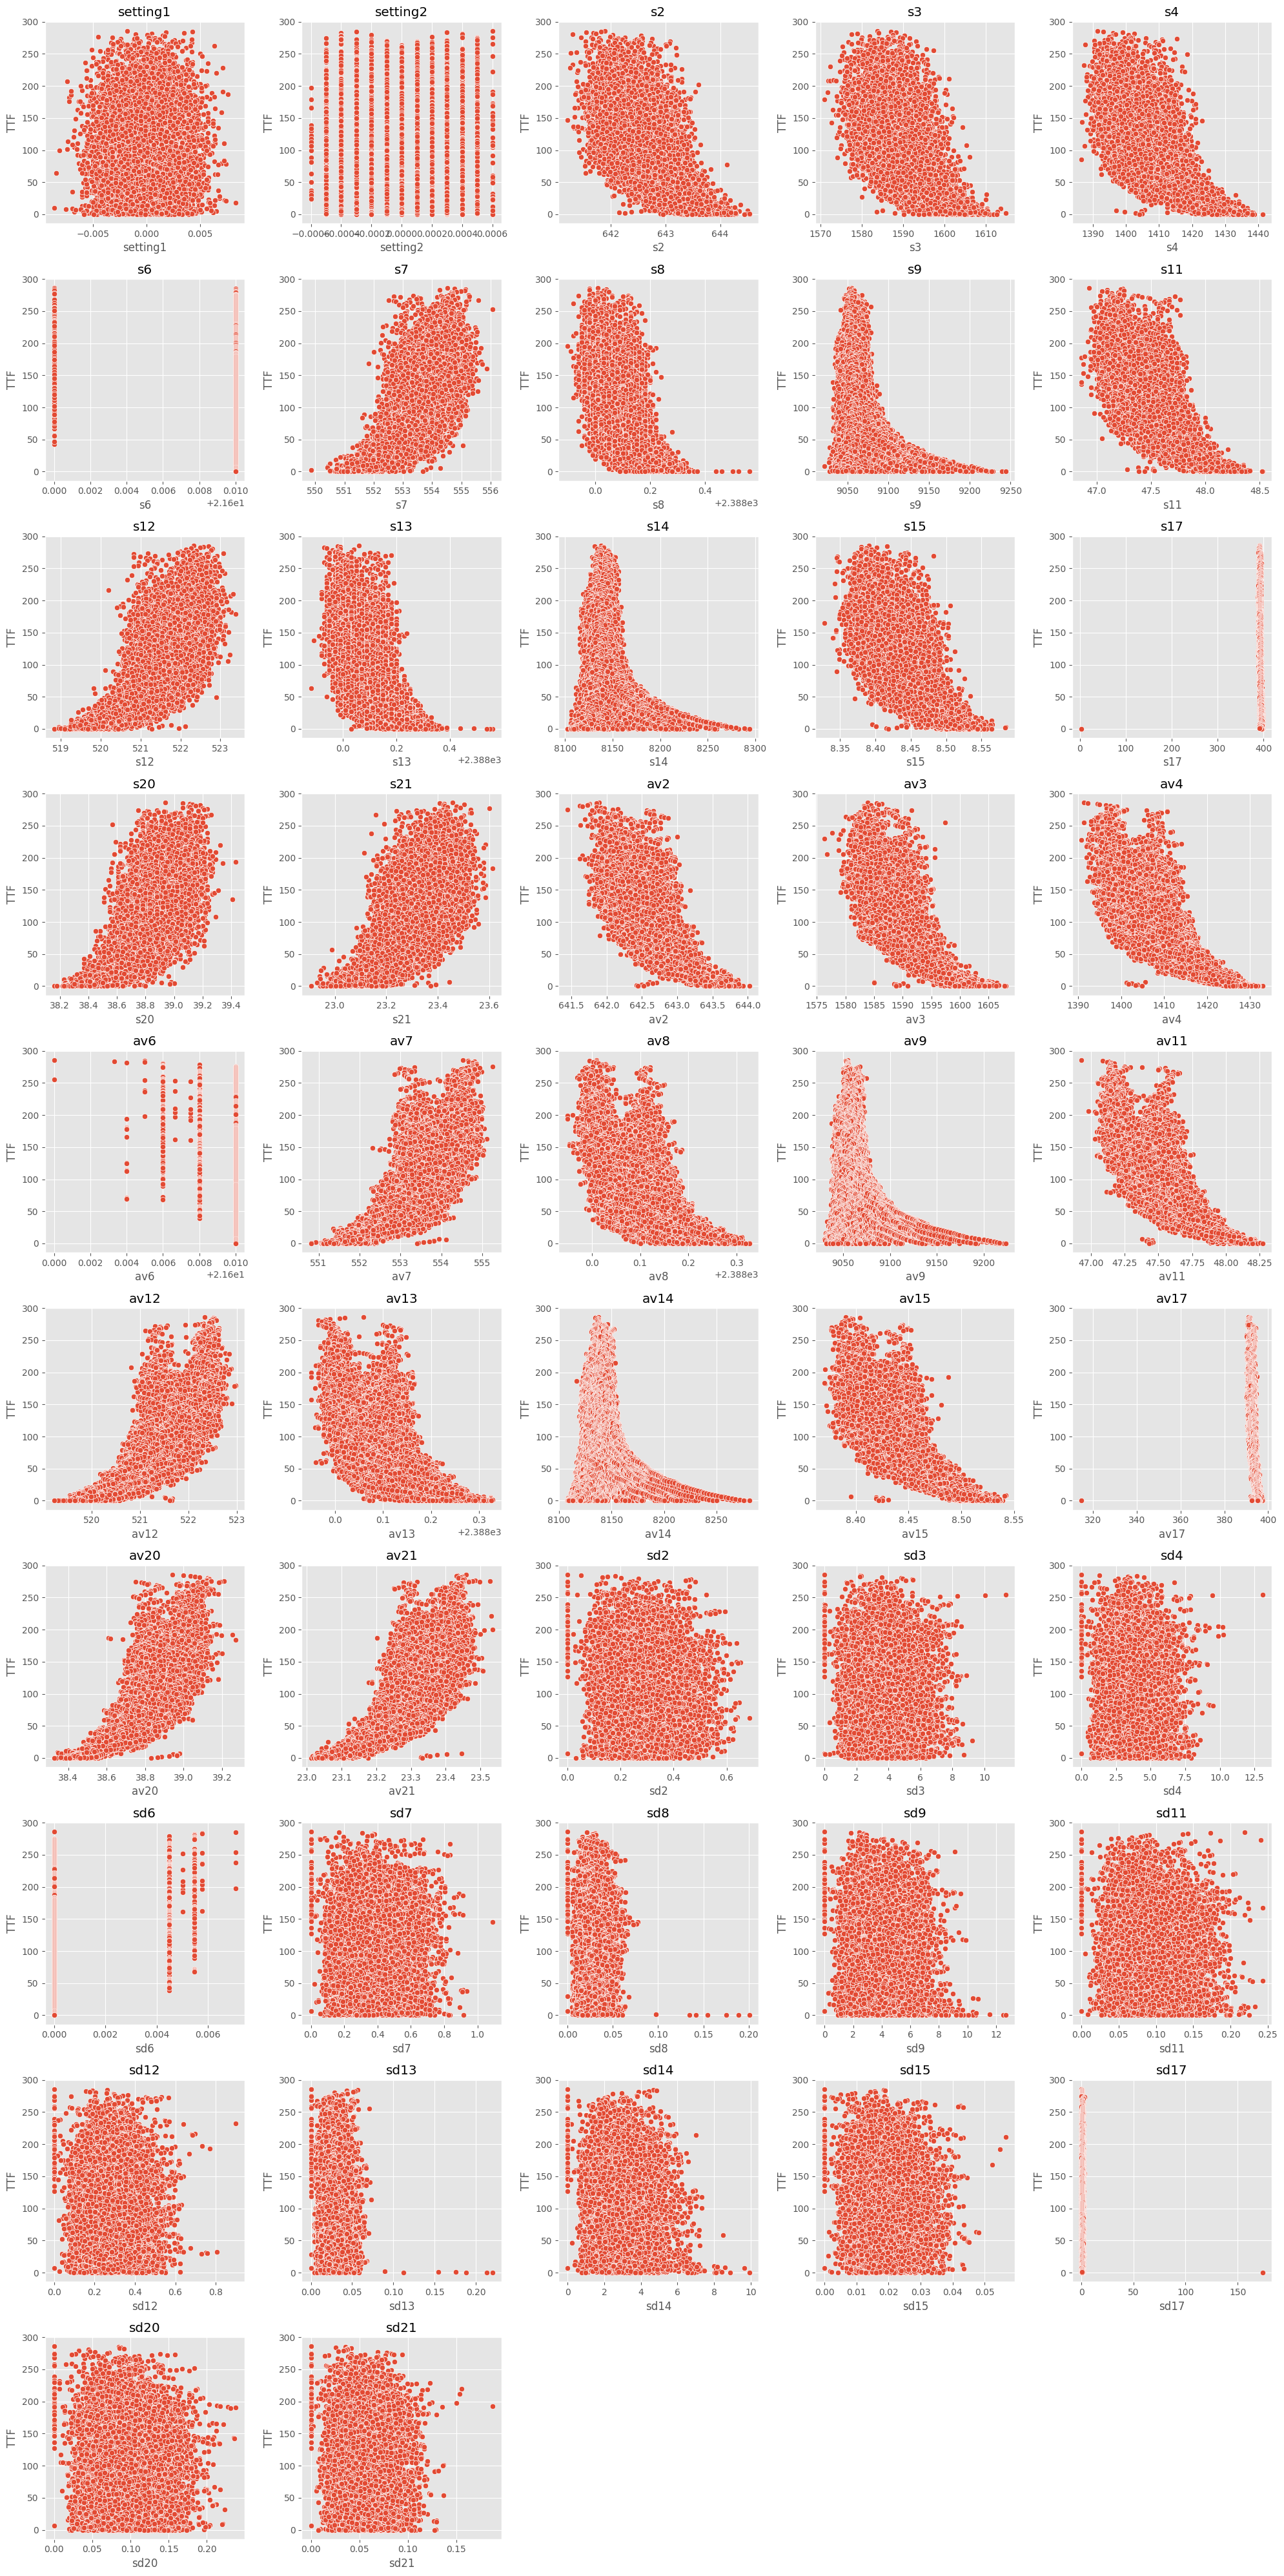

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Number of rows and columns for the subplot grid
n_rows = 10
n_cols = 5
plt.figure(figsize=(20, 40))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=d_train_raw[feature], y=d_train_raw['TTF'])
    plt.title(feature)

plt.tight_layout()
plt.show()


As we can see, there are some features that are gonna be selected for removal , and some features that are gonna be selected for training. We selected the ones with positive correlation with TTF. Then, as we visualisated the scatter plots, we eliminated from the positive ones 'sd6' , 'setting2' and 'setting1' as they show no high correlation in the figures.

In [51]:
features_correl=['av21','av20','av12','av7','s12','s7','s21','s20']

['av21','av20','av12','av7','s12','s7','s21','s20'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.

Let's now analyse their correlation with each other, in a heatmap.

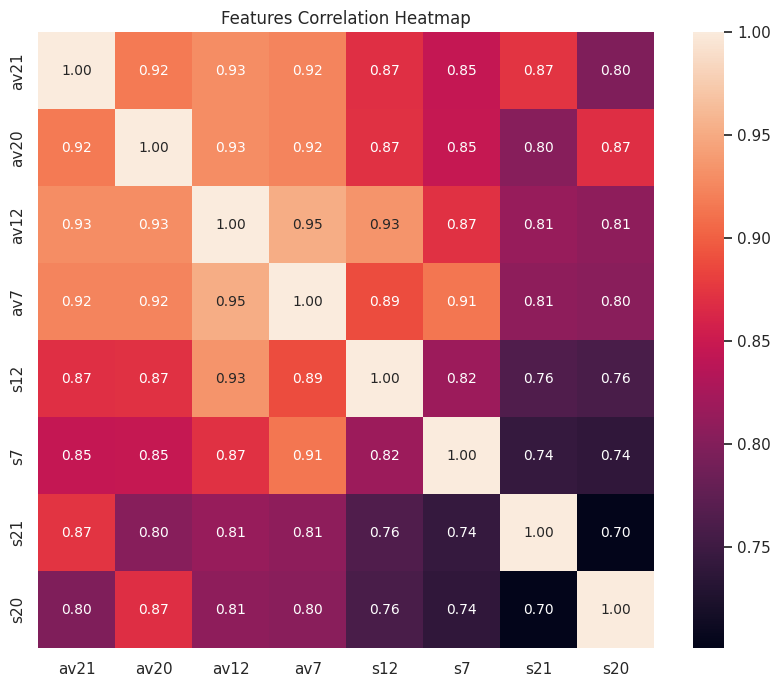

In [58]:
corr_matrix = d_train_raw[features_correl].corr()
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=features_correl, xticklabels=features_correl)
plt.title('Features Correlation Heatmap')
plt.show()


There is a very high correlation (> 0.8) between some features as seen on the heatmap.
This may hurt the performance of some ML algorithms.

So, some of the above features will be target for removal in feature selection, and we wil remove the feature that has low correlation with TTF from the two high correlated features. Let's not drop them for now.

Let's do some data visualisation so we analyse some aspects.

As we wanna predict the engine's TTF, let's visualize the engines' lives.

Text(0.5, 1.0, 'Life of Engines')

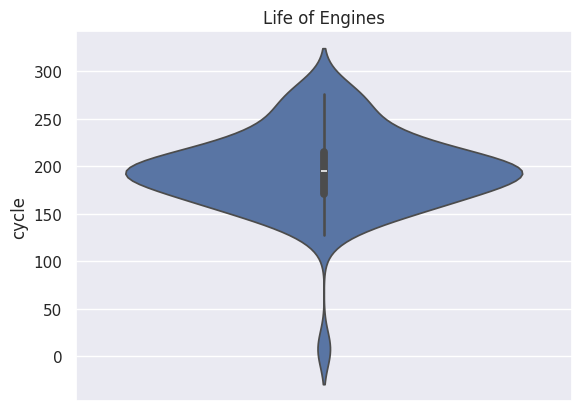

In [60]:
L = d_train_raw[["id","cycle"]].groupby("id").max()
sns.violinplot(L.cycle)
plt.title("Life of Engines")

As the plot shows, average life of an Engine is around 200 cycles but some engines lived plus than 300 cycles as well.

As we continue our analyis, we assume that there should be some signal in the last cycles (last 50 cycles for example) showing that the engine will soon fail. Let's visualize the times series of our sensor's features of some engines last 50 cycle. We 're gonna use the 15 first engines.

In [62]:
visualization_df = d_train_raw[(d_train_raw.id <= 15) & (d_train_raw.TTF <= 50)].groupby('id', as_index = False).\
    apply(lambda x: x.reset_index(drop = True)).reset_index()
visualization_df.head()


level_0  level_1  id  cycle  setting1  setting2      s2       s3       s4  \
0        0        0   1    142    0.0026    0.0002  642.51  1595.29  1413.42   
1        0        1   1    143   -0.0005   -0.0003  642.77  1593.10  1404.21   
2        0        2   1    144    0.0025   -0.0004  643.09  1591.89  1405.76   
3        0        3   1    145   -0.0004   -0.0001  642.95  1594.92  1409.63   
4        0        4   1    146    0.0002   -0.0003  642.72  1586.75  1408.82   

      s6  ...      sd12      sd13      sd14      sd15      sd17      sd20  \
0  21.61  ...  0.414886  0.054129  3.861466  0.019409  1.000000  0.128763   
1  21.61  ...  0.308917  0.051478  3.391430  0.015161  0.836660  0.115888   
2  21.61  ...  0.315706  0.054129  3.376655  0.014695  0.707107  0.120291   
3  21.61  ...  0.287628  0.027019  3.599406  0.015749  1.140175  0.137186   
4  21.61  ...  0.296260  0.030496  2.548804  0.016253  1.224745  0.048166   

       sd21  TTF  BNC  MCC  
0  0.057774   50    0    0  
1  0.062149   49    0    0  
2  0.060861   48    0    0  
3  0.047916   47    0    0  
4  0.065672   46    0    0  

[5 rows x 54 columns]

In [64]:
visualization_df = visualization_df.drop('level_0',axis = 1).set_index('level_1')
visualization_df.head()

id  cycle  setting1  setting2      s2       s3       s4     s6  \
level_1                                                                   
0         1    142    0.0026    0.0002  642.51  1595.29  1413.42  21.61   
1         1    143   -0.0005   -0.0003  642.77  1593.10  1404.21  21.61   
2         1    144    0.0025   -0.0004  643.09  1591.89  1405.76  21.61   
3         1    145   -0.0004   -0.0001  642.95  1594.92  1409.63  21.61   
4         1    146    0.0002   -0.0003  642.72  1586.75  1408.82  21.61   

             s7       s8  ...      sd12      sd13      sd14      sd15  \
level_1                   ...                                           
0        553.11  2388.10  ...  0.414886  0.054129  3.861466  0.019409   
1        553.62  2388.13  ...  0.308917  0.051478  3.391430  0.015161   
2        553.77  2388.17  ...  0.315706  0.054129  3.376655  0.014695   
3        553.03  2388.13  ...  0.287628  0.027019  3.599406  0.015749   
4        552.60  2388.12  ...  0.296260  0.030496  2.548804  0.016253   

             sd17      sd20      sd21  TTF  BNC  MCC  
level_1                                               
0        1.000000  0.128763  0.057774   50    0    0  
1        0.836660  0.115888  0.062149   49    0    0  
2        0.707107  0.120291  0.060861   48    0    0  
3        1.140175  0.137186  0.047916   47    0    0  
4        1.224745  0.048166  0.065672   46    0    0  

[5 rows x 52 columns]

In [66]:
sensor_features=['s2', 's3', 's4', 's6', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']

In [67]:
len(sensor_features)

15

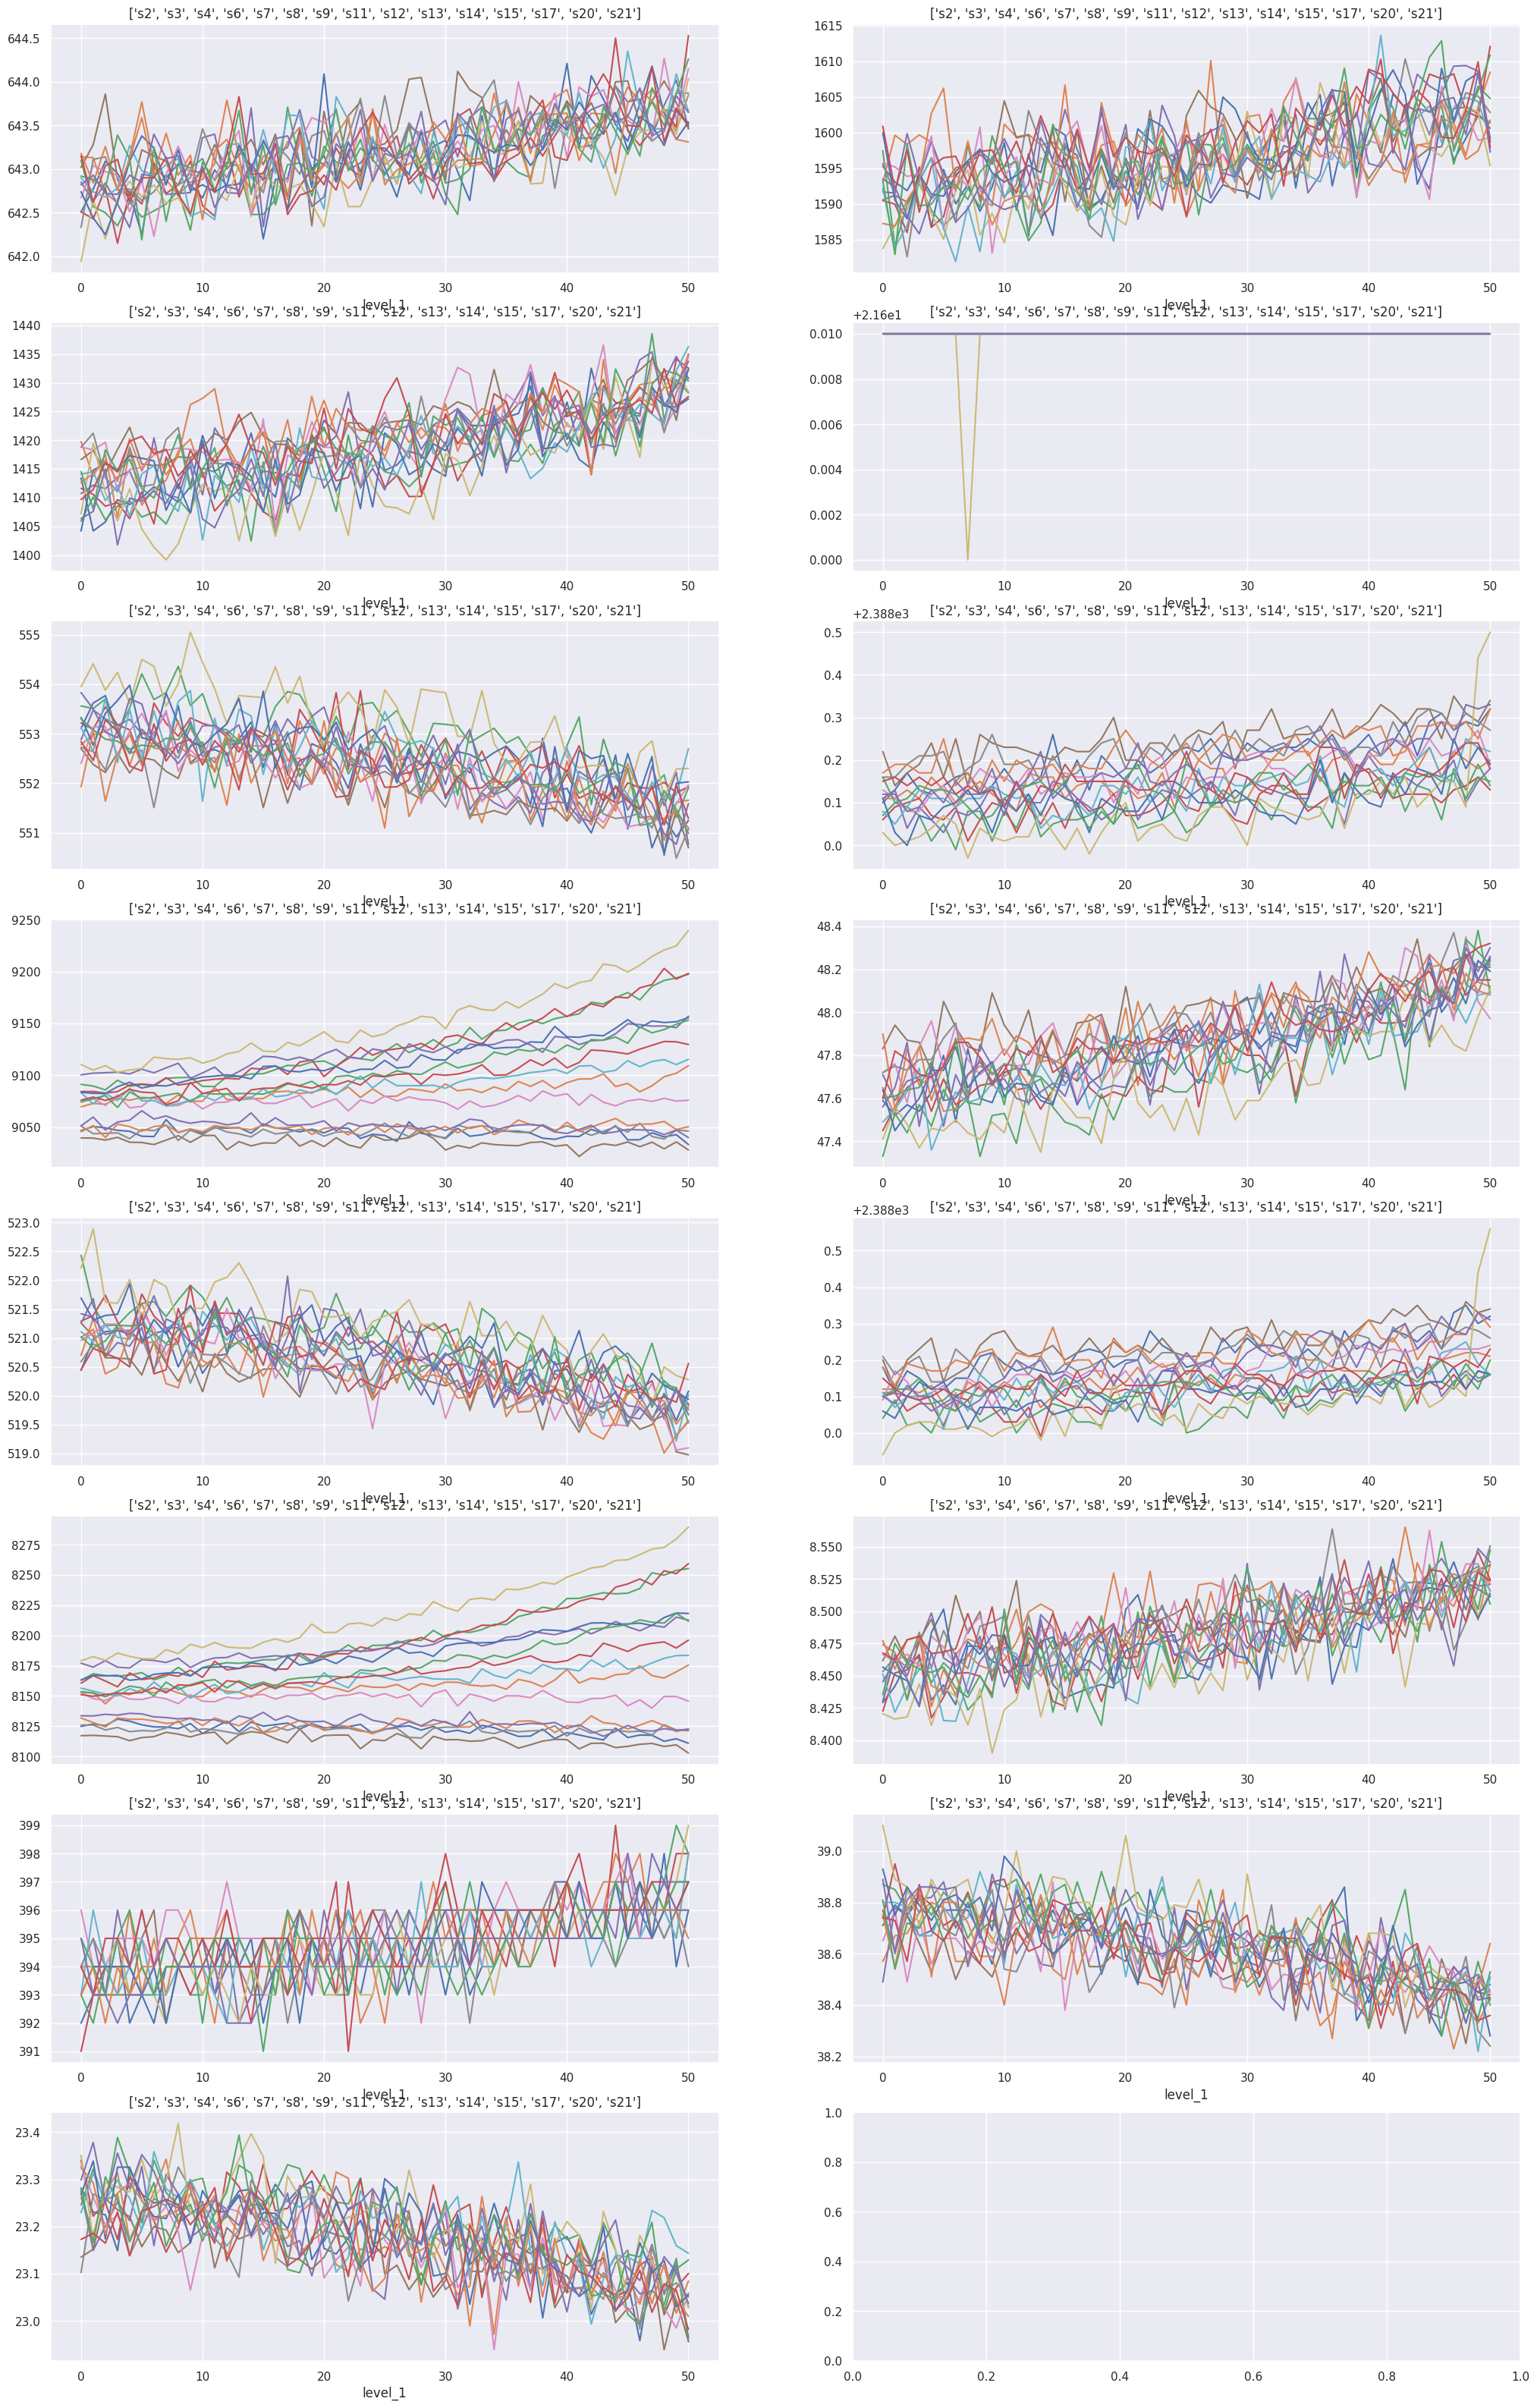

In [68]:
fig, ax = plt.subplots(figsize = (25,40), ncols = 2, nrows = 8)

ax = ax.ravel()
for i, feat in enumerate(sensor_features):
    visualization_df.groupby('id')[feat].plot(kind = "line", ax = ax[i])
    ax[i].set_title(sensor_features)

We see a strong signal in last 50 days before an engine's failure which can be quantified using various techniques.  Strong variations for most of our engines except for the 7th and 11th engine, where the sensors measurements tend to be bigger. We also noticed a weird plot for the 4th engine, where all the sensors measurements are 0 for the last 50 cycles.

Now as we visualised some of our features, and did a corrlation analysis for features extraction, let's check if the data is imbalanced, for the Binary classification.

In [69]:
print(d_train_raw['BNC'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(d_train_raw['BNC'].value_counts()[0]/d_train_raw['BNC'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(d_train_raw['BNC'].value_counts()[1]/d_train_raw['BNC'].count()))

0    10385
1     1930
Name: BNC, dtype: int64

Negaitve samples =  84%

Posiitve samples =  16%


This is clearly unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.